# <center> Implémentation des parcours dans un arbre </center>

## 1- Visualiser un arbre binaire

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


#####################################################################
#               COMMANDE POUR  DESSINER UN ARBRE                    #
#####################################################################

'''
 Il suffit de définir votre arbre par exemple : arbre=[5,[4,[],[]],[5,[],[]]
puis de taper view_tree(arbre)
'''

i=-1
def view_tree(arbre):
    global i
    class ArbreBinaire:
        def __init__(self, valeur,enfant_gauche,enfant_droit):
            #Attributs : valeur (en paramètre), gauche et droit( initialisés vides)
            self.valeur = valeur
            self.enfant_gauche = enfant_gauche
            self.enfant_droit = enfant_droit



    def construire_tree(mon_arbre):
            if mon_arbre!=[]:
                return ArbreBinaire(mon_arbre[0],construire_tree(mon_arbre[1]),construire_tree(mon_arbre[2]))
            
    def hauteur(arbre):
            if arbre is None:
                return 0
            else:
                return 1 + max(hauteur(arbre.enfant_gauche), hauteur(arbre.enfant_droit))
    
    def parkour(arbre, noeuds, branches, position, profondeur, pos_courante):
            if arbre is not None:
                noeuds.append(arbre.valeur)            # on complète la liste des noeuds
                position[arbre.valeur] = (pos_courante,profondeur)     # ... et la liste des positions
                profondeur -= 1
                if arbre.enfant_gauche is not None:
                    branches.append((arbre.valeur, arbre.enfant_gauche.valeur))  #... et la liste des branches
                    parkour(arbre.enfant_gauche, noeuds, branches, position, profondeur,
                            pos_courante - 2**(profondeur - 1))
                if arbre.enfant_droit is not None:
                    branches.append((arbre.valeur, arbre.enfant_droit.valeur))
                    parkour(arbre.enfant_droit, noeuds, branches, position, profondeur,
                            pos_courante + 2**(profondeur - 1))
            return noeuds, branches, position
        
        
    def bricolage1(arbre_terrier):
        if len(arbre_terrier)==0:
            return []
        else:
            return [arbre_terrier[0]] +  bricolage1(arbre_terrier[1]) + bricolage1(arbre_terrier[2])

    def bricolage2(arbre_terrier):
        dico={}
        k=0
        for elt in bricolage1(arbre_terrier):
            dico[k]=elt
            k=k+1
        return dico
  
    def bricolage3(arbre_terrier):
        global i
        if arbre_terrier==[]:
            return []
        else:
            i=i+1
            return [i,bricolage3(arbre_terrier[1]),bricolage3(arbre_terrier[2])]

    def repr_graph(arbre):
            plt.figure()
            noeuds = []             #liste des noeuds, racines et feuilles de l'arbre
            branches =[]            # liste des branches de l'arbre
            profond = hauteur(arbre)        #hauteur de l'arbre
            pos_courante = 2**(profond - 1)   # position de la racine (en abscisse)
            position = {}                # dictionnaire des positions des noeuds sur la figure

            # appel d'une fonction récursive de parcours, ici prefixe mais ça n'a pas d'importance
            # on récupère : la liste des noeuds, la liste des branches,
            # le dictionnaire des positions des noeuds
            noeuds, branche, position  = parkour(arbre, noeuds, branches, position, profond, pos_courante)
            #print(noeuds)
            #print("branche",branche)
            #print("position", position)
            mon_arbre = nx.Graph()          # objet Graphe de la bibliothèque Networkxx
            

            
            
            mon_arbre.add_nodes_from(noeuds)
            mon_arbre.add_edges_from(branches)
            #print(list(arbre.nodes))
            #print(list(arbre.edges))
            options = {
                "font_size": 12,
                "node_size": 300,
                "node_color": "white",
                "edge_color" : "black",
                "edgecolors": "blue",
                "linewidths": 1,
                "width": 2,
            }
            nx.draw_networkx(mon_arbre, pos = position, **options,labels=dico, with_labels = True)
            ax = plt.gca()
            ax.margins(0.20)
            plt.axis("off")
            plt.show()
            #plt.close(fig)
            #return mon_arbre     #on renvoie l'objet graphe networkxx au cas où
    
    dico=bricolage2(arbre)
    arbre=bricolage3(arbre)
    repr_graph(construire_tree(arbre))
    i=-1

<b>Tester le code : </b>

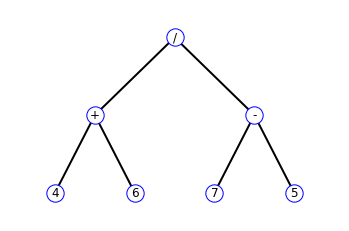

In [2]:
chene=['/',['+',[4,[],[]],[6,[],[]]],['-',[7,[],[]],[5,[],[]]]]
view_tree(chene)

## 2- Quelques prédicats

In [3]:
def est_vide(arbre) :
    """
    prédicat retournant True si l'arbre passé en paramètre est vide
    False sinon
    return : boolean
    """
    return len(arbre)==0 #ou arbre==[]

def etiquette(noeud):
    return noeud[0]

def fils_gauche(noeud):
    return noeud[1]

def fils_droit(noeud):
    return noeud[2]

# Parcours en largeur

Voici le pseudo-code d'un parcours en largeur. 

<pre>
Algorithme  ParcoursLargeur(A)
'''
Entrée : un arbre binaire A
Sortie : None
'''
    F   est une file vide
    Si A  n'est pas vide, l'ajouter à F
    Tant que F est non vide :
        y  est le sommet de F
        défiler un élément de F
        Afficher l'etiquett de y
        Si le fils droit de y  n'est pas vide 
            l'ajouter à F
        Si le fils gauche de y  n'est pas vide 
            l'ajouter à F
</pre>

### <b> Exercice 1 <br> 
    1- Implémentation en Python. Compléter la fonction ci-dessous :
    
    Pour éviter le saut de ligne du print : print(etiquette(y),end="  ")

In [4]:
def ParcoursLargeur(A):
    '''
    Entrée : un arbre binaire A
    Sortie : None
    '''
    F=[]
    if not est_vide(A):
        F.append(A)
        while F !=[]:
            y=F.pop(0)
            print(etiquette(y),end="  ")
            if not est_vide(fils_droit(y)):
                F.append(fils_gauche(y))
            if not est_vide(fils_gauche(y)):
                F.append(fils_droit(y))

    2-  Tester votre algo avec  l'exemple ci-dessous :

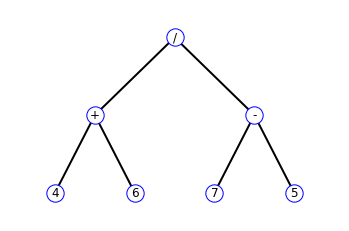

/  +  -  4  6  7  5  

In [5]:
view_tree(chene)
ParcoursLargeur(chene)

    3-  Reprendre votre algorithme précedent et apporte les modification necessaires afin que la file F soit gérée comme une PILE.

In [6]:
def ParcoursMODIF(A):
    '''
    Entrée : un arbre binaire A
    Sortie : None
    '''
    F=[]
    if not est_vide(A):
        F.append(A)
        while F !=[]:
            y=F.pop()
            print(etiquette(y),end="  ")
            if not est_vide(fils_droit(y)):
                F.append(fils_droit(y))
            if not est_vide(fils_gauche(y)):
                F.append(fils_gauche(y))

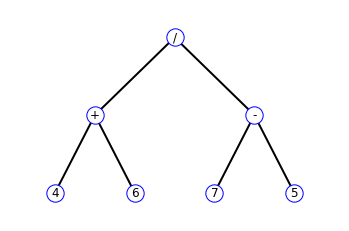

/  +  4  6  -  7  5  

In [7]:
view_tree(chene)
ParcoursMODIF(chene)

    4-    Que remarquez-vous ?

## Parcours en profondeur

### Parcours préfixe
Dans un parcours préfixe chaque noeud est visité avant que ses enfants soient visités.


In [8]:
def ParcoursPrefixe(A):
    # Entrée : un arbre binaire A
    if not est_vide(A):
        print(etiquette(A),end="  ")
        ParcoursPrefixe(fils_gauche(A))
        ParcoursPrefixe(fils_droit(A))

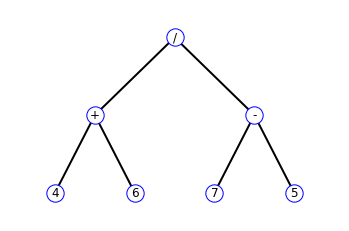

NameError: name 'parcours_prefixe' is not defined

In [9]:
view_tree(chene)
parcours_prefixe(chene)

### Parcours suffixe (ou postfixe)


Dans un parcours postfixe, chaque noeud est visité après que ses enfants sont visités.


In [ ]:
def ParcoursSuffixe(A):
    # Entrée : un arbre binaire A
    if not est_vide(A):
        ParcoursSuffixe(fils_gauche(A))
        ParcoursSuffixe(fils_droit(A))
        print(etiquette(A),end="  ")

In [ ]:
view_tree(chene)
ParcoursSuffixe(chene)

## Parcours infixe


Dans un parcours infixe (inorder traversal ), chaque noeud est visité après son fils gauche mais avant son fils droit.

In [ ]:
def ParcoursInfixe(A):
    # Entrée : un arbre binaire A
    if not est_vide(A):
        ParcoursInfixe(fils_gauche(A))
        print(etiquette(A),end="  ")
        ParcoursInfixe(fils_droit(A))

In [ ]:
view_tree(chene)
ParcoursInfixe(chene)

Modifier votre algorithme afin de gérer les parenthèses. Pour obtenir un affichage :
(((4)+(6))/((7)-(5)))

In [ ]:
def ParcoursInfixeV2(A):
    # Entrée : un arbre binaire A
    if not est_vide(A):
        print("(",end="")
        ParcoursInfixeV2(fils_gauche(A))
        print(etiquette(A),end="")
        ParcoursInfixeV2(fils_droit(A))
        print(")",end="")

In [ ]:
view_tree(chene)
ParcoursInfixeV2(chene)

## Bilan 

 Tester vos parcours sur l'arbre ci-dessous :

In [ ]:
bilan=["*", ["+",[3,[],[]],["/",[4,[],[]],[2,[],[]]]],["-",["*",[2,[],[]],["3",[],[]]],["8",[],[]]]]

In [ ]:
view_tree(bilan)

In [ ]:
print("Largeur : ", end=" ")
ParcoursLargeur(bilan)
print("")
print("Longueur : ", end=" ")
ParcoursMODIF(bilan)
print("")
print("prefixe : ", end=" ")
ParcoursPrefixe(bilan)
print("")
print("suffixe : ", end=" ")
ParcoursSuffixe(bilan)
print("")
print("infixe :  ", end=" ")
ParcoursInfixe(bilan)
print("")
print("infixe (parentheses) : ", end=" ")
ParcoursInfixeV2(bilan)